In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf


In [3]:
from keras.models import Sequential, Model

from keras.layers import Dense, Flatten, Activation 

from keras.preprocessing.image import ImageDataGenerator

from keras import optimizers, applications

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input

from keras.preprocessing import image


from keras.preprocessing.image import ImageDataGenerator


from keras.layers.normalization import BatchNormalization

from keras.optimizers import Adam

from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

from keras import backend as K 

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np 

import pandas as pd


import cv2 

import PIL 

import matplotlib.pyplot as plt

from sklearn.model_selection import  train_test_split

from tensorflow import set_random_seed


from math import ceil

from tqdm import tqdm

import gc

import psutil

import keras

import math

import sys

from keras.preprocessing.image import array_to_img

from keras.preprocessing.image import img_to_array

from keras.preprocessing.image import load_img

import os
print(os.listdir("C:\\Users\\sohel-aiub\\Pictures\\Camera Roll\\Retina"))

Using TensorFlow backend.


['.ipynb_checkpoints', 'sample_submission.csv', 'test.csv', 'test_images', 'train.csv', 'train_images']


In [4]:
df_train=pd.read_csv("C:\\Users\\sohel-aiub\\Pictures\\Camera Roll\\Retina\\train.csv")

df_test=pd.read_csv("C:\\Users\\sohel-aiub\\Pictures\\Camera Roll\\Retina\\test.csv") 

In [5]:
SEED = 42
np.random.seed(SEED)
set_random_seed(SEED)

dir_path = "C:\\Users\\sohel-aiub\\Pictures\\Camera Roll\\Retina"

IMG_DIM =224
BATCH_SIZE = 32

CHANNEL_SIZE = 3

NUM_EPOCHS =3

TRAIN_DIR = 'train_images'

TEST_DIR = 'test_images'

CLASSS = {0: "No DR", 1: "Mild", 2: "Moderate", 3: "Severe", 4: "Proliferative DR"}

In [6]:
df_train = pd.read_csv(os.path.join(dir_path, "train.csv"))

df_test = pd.read_csv(os.path.join(dir_path, "test.csv"))

NUM_CLASSES = df_train['diagnosis'].nunique()

In [7]:
print("Training set has {} samples and {} classes.".format(df_train.shape[0], df_train.shape[1]))

print("Testing set has {} samples and {} classes.".format(df_test.shape[0], df_test.shape[1]))

Training set has 3662 samples and 2 classes.
Testing set has 1928 samples and 1 classes.


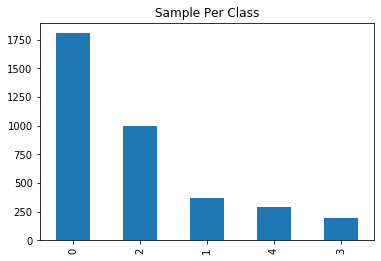

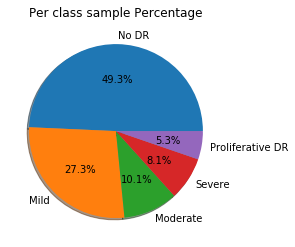

In [8]:
chat_data = df_train.diagnosis.value_counts()
chat_data.plot(kind='bar');
plt.title('Sample Per Class');
plt.show()
plt.pie(chat_data, autopct='%1.1f%%', shadow=True, labels=["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"])
plt.title('Per class sample Percentage');
plt.show()


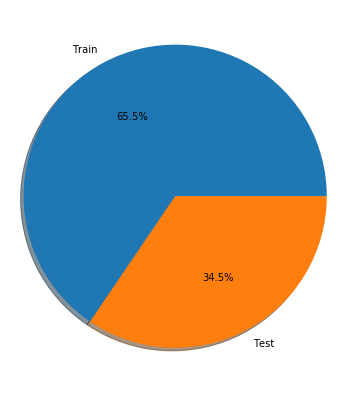

In [9]:
# Train & Test samples ratio
# Plot Data
labels = 'Train', 'Test'
sizes = df_train.shape[0], df_test.shape[0]
colors = 'lightskyblue', 'lightcoral'
# Plot
plt.figure(figsize=(6, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_train.id_code, 
                                                    df_train.diagnosis, test_size=0.15,
                                                    random_state=SEED, 
                                                    stratify=df_train.diagnosis)

In [11]:
def draw_img(imgs, target_dir, class_label='0'):
    fig, axis = plt.subplots(5,6, figsize=(15, 6))
    for idnx, (idx, row) in enumerate(imgs.iterrows()):
        imgPath = os.path.join(dir_path, f"{target_dir}/{row['id_code']}.png")
        img = cv2.imread(imgPath)
        row = idnx // 6
        col = idnx % 6
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axis[row, col].imshow(img)
    plt.suptitle(class_label)
    plt.show()

In [12]:
#Visualizaion of all cagagorical images

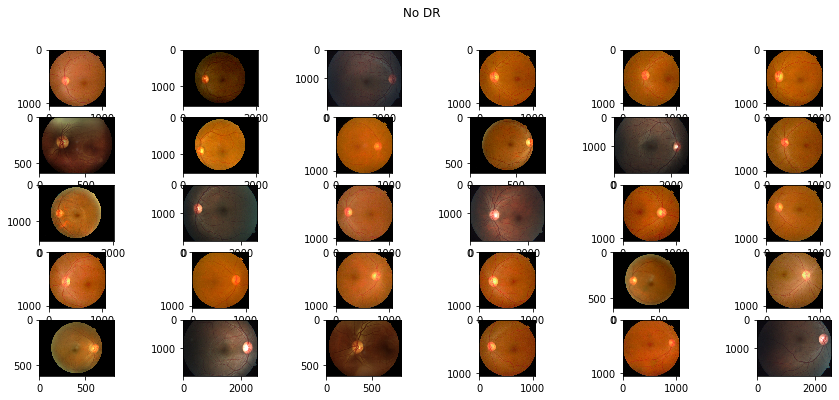

In [13]:
CLASS_ID = 0
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(30), 'train_images', CLASSS[CLASS_ID])

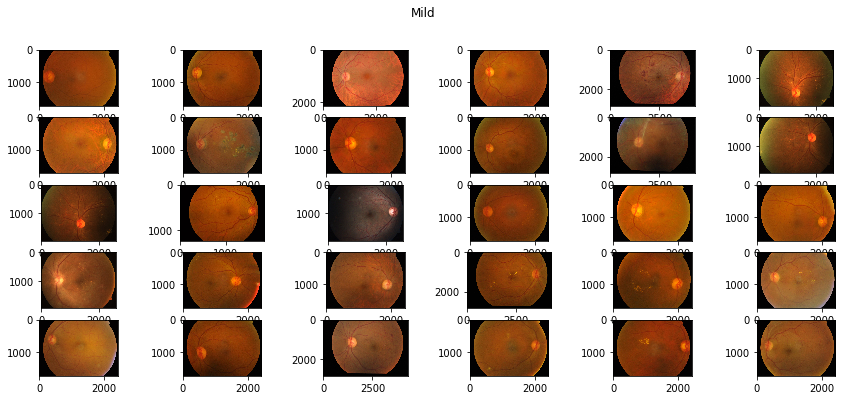

In [14]:
CLASS_ID = 1
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(30), 'train_images', CLASSS[CLASS_ID])

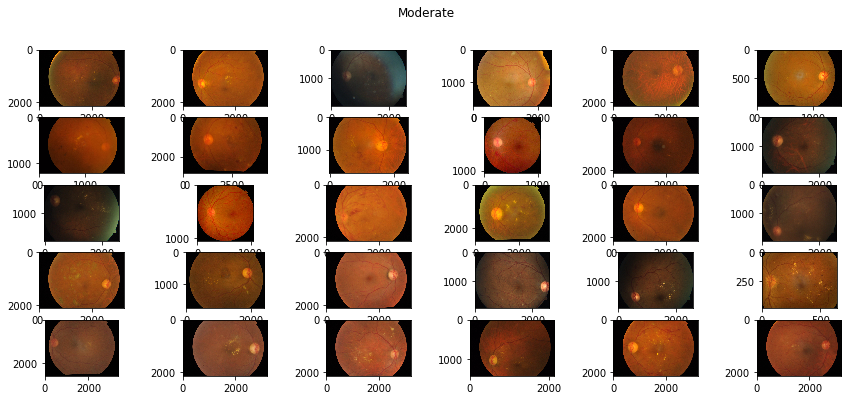

In [15]:
CLASS_ID = 2
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(30), 'train_images', CLASSS[CLASS_ID])

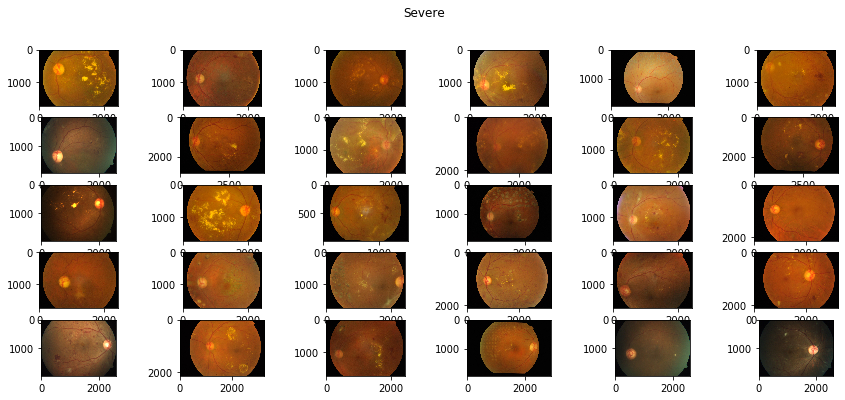

In [16]:
CLASS_ID = 3
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(30), 'train_images', CLASSS[CLASS_ID])

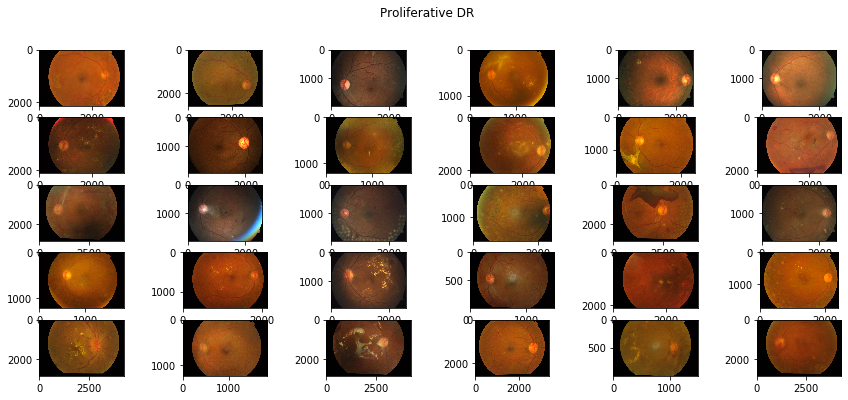

In [17]:
CLASS_ID = 4
draw_img(df_train[df_train.diagnosis == CLASS_ID].head(30), 'train_images', CLASSS[CLASS_ID])

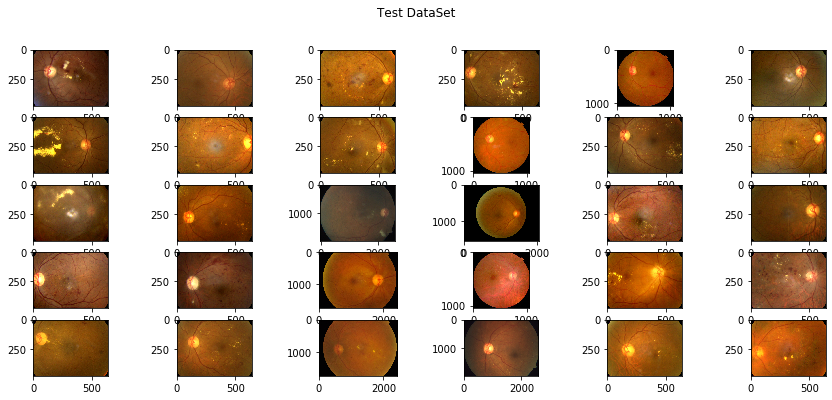

In [18]:
CLASS_ID = 'Test DataSet'
draw_img(df_test.sample(30, random_state=SEED), 'test_images', CLASS_ID)

In [19]:
#Max Min Height and Width


def check_max_min_img_height_width(df, img_dir):
    max_Height , max_Width =0 ,0
    min_Height , min_Width =sys.maxsize ,sys.maxsize 
    for idx, row in df.iterrows():
        imgPath=os.path.join(dir_path,f"{img_dir}/{row['id_code']}.png") 
        img=cv2.imread(imgPath)
        H,W=img.shape[:2]
        max_Height=max(H,max_Height)
        max_Width =max(W,max_Width)
        min_Height=min(H,min_Height)
        min_Width =min(W,min_Width)
    return max_Height, max_Width, min_Height, min_Width
                             

In [20]:
#check_max_min_img_height_width(df_train, TRAIN_DIR)

In [21]:
#check_max_min_img_height_width(df_test, TEST_DIR)

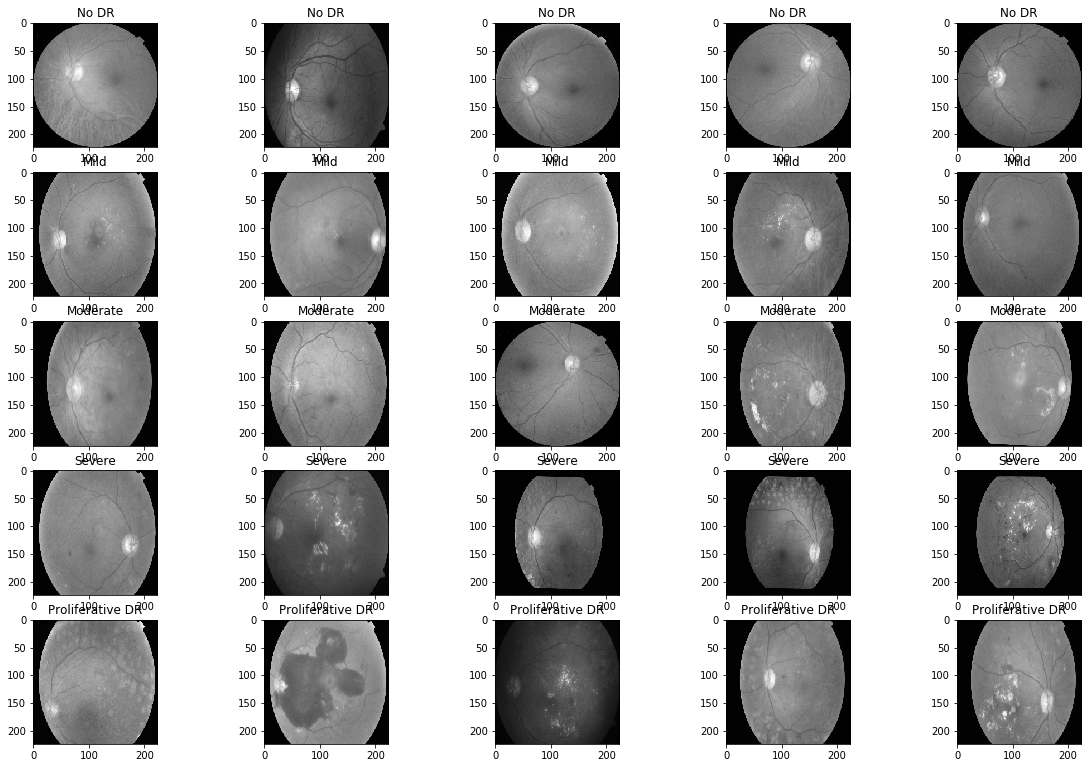

In [22]:
#GrayScale Images
figure = plt.figure(figsize=(20, 16))
for target_class in (y_train.unique()):
    for i, (idx, row) in enumerate(
            df_train.loc[df_train.diagnosis == target_class].sample(5, random_state=SEED).iterrows()):
        ax = figure.add_subplot(6, 5, target_class * 5 + i + 1)
        imagefile = f"C:\\Users\\sohel-aiub\\Pictures\\Camera Roll\\Retina\\train_images\\{row['id_code']}.png"
        img = cv2.imread(imagefile)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (IMG_DIM, IMG_DIM))
        plt.imshow(img, cmap='gray')
        ax.set_title(CLASSS[target_class])

In [23]:
# Add Lighting to the images for improving the visibility 

def draw_img_light(imgs, target_dir, class_label='0'):
    fig, axis = plt.subplots(5, 6, figsize=(15, 6))
    for idnx, (idx, row) in enumerate(imgs.iterrows()):
        imgPath = os.path.join(dir_path, f"{target_dir}/{row['id_code']}.png")
        img = cv2.imread(imgPath)
        row = idnx // 6
        col = idnx % 6
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_DIM, IMG_DIM))
        img=cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , IMG_DIM/10) ,-4 ,128) # the trick is to add this line
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        axis[row, col].imshow(img, cmap='gray')
    plt.suptitle(class_label)
    plt.show()


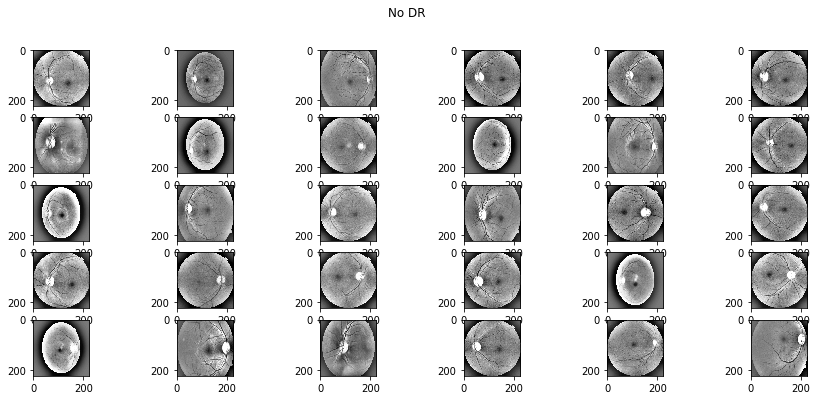

In [24]:
CLASS_ID = 0
draw_img_light(df_train[df_train.diagnosis == CLASS_ID].head(30), 'train_images', CLASSS[CLASS_ID])

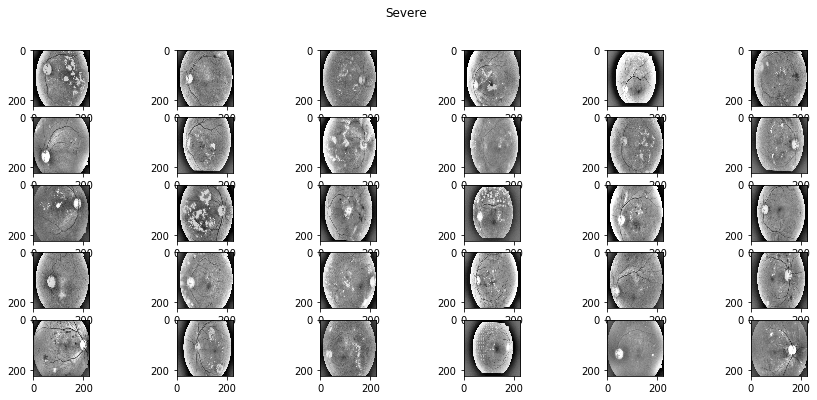

In [25]:
CLASS_ID = 3
draw_img_light(df_train[df_train.diagnosis == CLASS_ID].head(30), 'train_images', CLASSS[CLASS_ID])

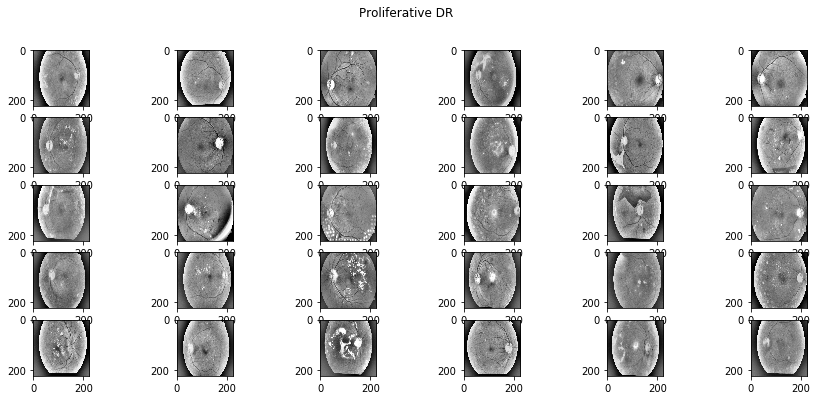

In [26]:
CLASS_ID = 4
draw_img_light(df_train[df_train.diagnosis == CLASS_ID].head(30), 'train_images', CLASSS[CLASS_ID])

In [27]:
def crop_image(img,tol=7):
    w, h = img.shape[1],img.shape[0]
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_img = cv2.blur(gray_img,(5,5))
    shape = gray_img.shape 
    gray_img = gray_img.reshape(-1,1)
    quant = quantile_transform(gray_img, n_quantiles=256, random_state=0, copy=True)
    quant = (quant*256).astype(int)
    gray_img = quant.reshape(shape)
    xp = (gray_img.mean(axis=0)>tol)
    yp = (gray_img.mean(axis=1)>tol)
    x1, x2 = np.argmax(xp), w-np.argmax(np.flip(xp))
    y1, y2 = np.argmax(yp), h-np.argmax(np.flip(yp))
    if x1 >= x2 or y1 >= y2 : # something wrong with the crop
        return img # return original image
    else:
        img1=img[y1:y2,x1:x2,0]
        img2=img[y1:y2,x1:x2,1]
        img3=img[y1:y2,x1:x2,2]
        img = np.stack([img1,img2,img3],axis=-1)
    return img

def process_image(image, size=512):
    image = cv2.resize(image, (size,int(size*image.shape[0]/image.shape[1])))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    try:
        image = crop_image(image, tol=15)
    except Exception as e:
        image = image
        print( str(e) )
    return image

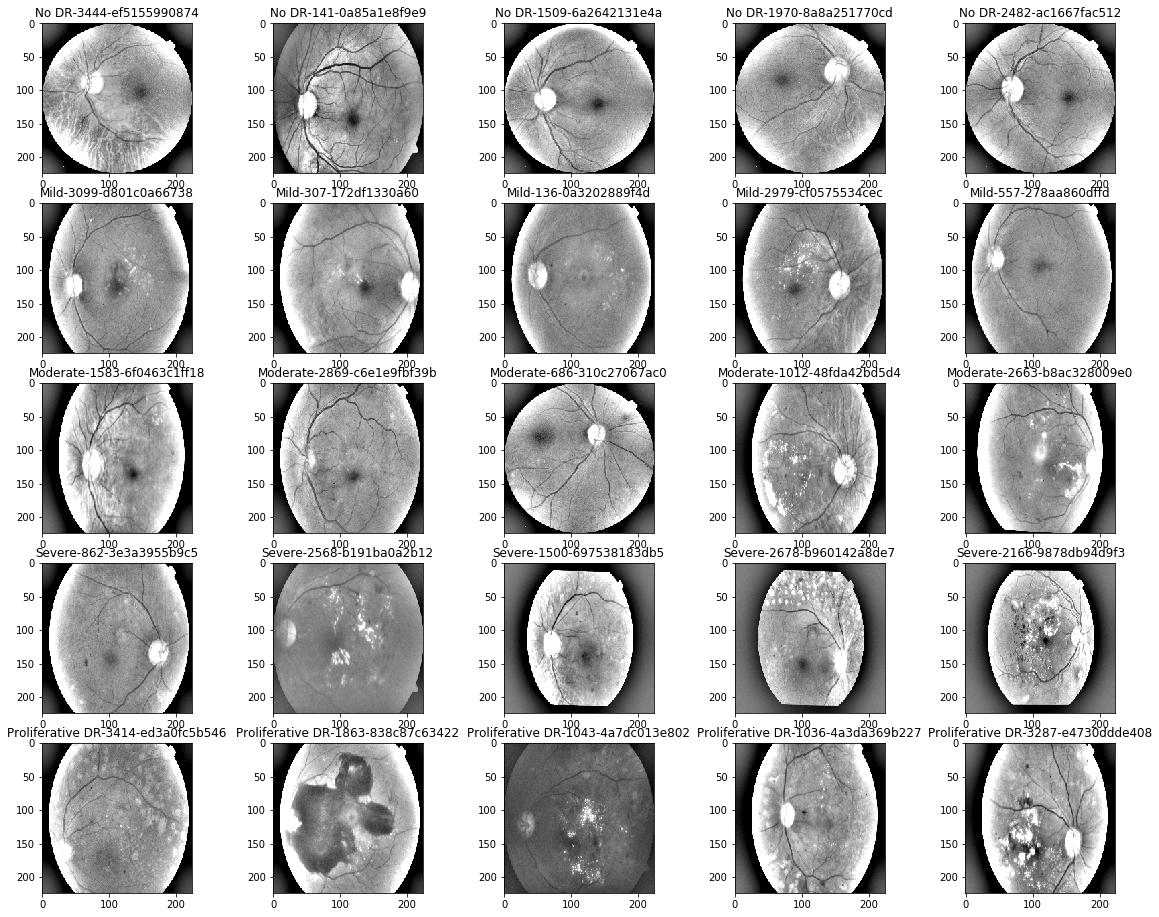

In [28]:
# Display some random images from Data Set with class categories. showig Gray image removing other channel and adding lighting to image.
figure = plt.figure(figsize=(20, 16))
for target_class in (y_train.unique()):
    #     print(CLASSS[target_class],target_class)
    for i, (idx, row) in enumerate(
            df_train.loc[df_train.diagnosis == target_class].sample(5, random_state=SEED).iterrows()):
        ax = figure.add_subplot(5, 5, target_class * 5 + i + 1)
        imagefile = f"C:\\Users\\sohel-aiub\\Pictures\\Camera Roll\\Retina\\train_images\\{row['id_code']}.png"
        img = cv2.imread(imagefile)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (IMG_DIM, IMG_DIM))
        img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), IMG_DIM / 10), -4, 128)
        plt.imshow(img, cmap='gray')
        ax.set_title('%s-%d-%s' % (CLASSS[target_class], idx, row['id_code']))
#         print(row['id_code'])
plt.show()

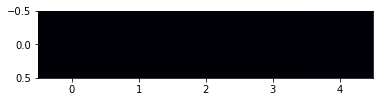

In [29]:
imgPath = f"C:\\Users\\sohel-aiub\\Pictures\\Camera Roll\\Retina\\train_images\\3cd9713c0ecb.png"
img = cv2.imread(imgPath)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x, y, w, h = cv2.boundingRect(cnt)
img = img[y:y + h, x:x + w]
plt.imshow(img)

In [30]:
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    img = img[y:(y + dy), x:(x + dx), :]
    return img

def crop_generator(batches, crop_length):
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[0] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)


In [31]:
print("available RAM:", psutil.virtual_memory())
gc.collect()
print("available RAM:", psutil.virtual_memory())

df_train.id_code = df_train.id_code.apply(lambda x: x + ".png")
df_test.id_code = df_test.id_code.apply(lambda x: x + ".png")
df_train['diagnosis'] = df_train['diagnosis'].astype('str')

available RAM: svmem(total=17137582080, available=13798191104, percent=19.5, used=3339390976, free=13798191104)
available RAM: svmem(total=17137582080, available=13798096896, percent=19.5, used=3339485184, free=13798096896)


In [32]:
# Creating the imageDatagenerator Instance 
datagenerator=ImageDataGenerator( horizontal_flip=True,
                                         vertical_flip=True, 
                                         rotation_range=40, 
                                         zoom_range=0.2, 
                                         shear_range=0.1,
                                        fill_mode='nearest')

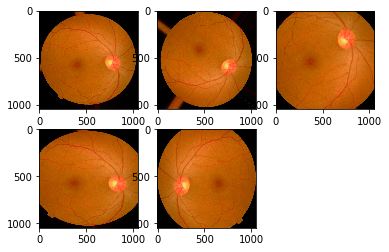

In [33]:
imgPath = f"C:\\Users\\sohel-aiub\\Pictures\\Camera Roll\\Retina\\train_images\\3cd9713c0ecb.png"
# Loading image
img = load_img(imgPath)
data = img_to_array(img)
samples =np.expand_dims(data, 0)
i=5
it=datagenerator.flow(samples , batch_size=1)
for i in range(5):
    plt.subplot(230 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [34]:
train_datagen = ImageDataGenerator(rescale=1. / 255, 
                                         validation_split=0.15, 
                                         horizontal_flip=True,
                                         vertical_flip=True, 
                                         rotation_range=40, 
                                         zoom_range=0.2, 
                                         shear_range=0.2,
                                        fill_mode='nearest')
# valid_datagen=image.ImageDataGenerator(rescale=1./255)

In [35]:
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory="C:\\Users\\sohel-aiub\\Pictures\\Camera Roll\\Retina\\train_images",
                                                    x_col="id_code",
                                                    y_col="diagnosis",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    target_size=(IMG_DIM, IMG_DIM),
                                                    subset='training',
                                                    shaffle=True,
                                                    seed=SEED,
                                                    )
valid_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory="C:\\Users\\sohel-aiub\\Pictures\\Camera Roll\\Retina\\train_images",
                                                    x_col="id_code",
                                                    y_col="diagnosis",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    target_size=(IMG_DIM, IMG_DIM),
                                                    subset='validation',
                                                    shaffle=True,
                                                    seed=SEED
                                                    )

Found 3113 validated image filenames belonging to 5 classes.
Found 549 validated image filenames belonging to 5 classes.


In [36]:
from keras.activations import softmax
from keras.activations import elu
from keras.activations import relu
gc.enable()


In [37]:
def design_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(1, 1), input_shape=[IMG_DIM, IMG_DIM, CHANNEL_SIZE], activation=relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=128, kernel_size=(1, 1), activation=relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=128, kernel_size=(1, 1), activation=relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=256, activation=relu))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=512, activation=relu))
    model.add(Dense(5, activation='softmax'))
    return model


history = design_model()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
history.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     8320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       16512     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
__________

In [39]:
history.compile(loss='mean_squared_error',
                optimizer=Adam(),
                 metrics=['accuracy'])

In [40]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint


In [41]:
lr_reducer = ReduceLROnPlateau(factor = np.sqrt(0.1), cooldown=0, patience=2, min_lr=0.5e-6,mode='auto',verbose=1)

csv_logger = CSVLogger('Retina using cnn.csv')

early_stopper = EarlyStopping(min_delta=0.001,patience=30)

filepath = "saved-model-{epoch:02d}-{val_acc:.2f}.hdf5"

model_checkpoint = ModelCheckpoint(filepath,
                                   monitor = 'val_loss',
                                   verbose = 1,
                                   mode='max',
                                   save_best_only=True)

In [42]:
batch_size=BATCH_SIZE
Epochs=100

In [43]:
nb_train_samples =train_generator.n//train_generator.batch_size

nb_validation_samples = valid_generator.n//valid_generator.batch_size


In [44]:
                        

history.fit_generator(generator=train_generator,
                      
                      steps_per_epoch=nb_train_samples,
                                            
                      epochs=Epochs,
                      
                      validation_data=valid_generator,

                      validation_steps=nb_validation_samples,
                      
                      callbacks=[lr_reducer,early_stopper,csv_logger,model_checkpoint],

                      verbose=1)
                                                                                       


Epoch 1/100
97/97 [==============================] - ETA: 9:10 - loss: 0.1603 - acc: 0.125 - ETA: 6:04 - loss: 0.1597 - acc: 0.312 - ETA: 5:19 - loss: 0.1591 - acc: 0.364 - ETA: 5:07 - loss: 0.1584 - acc: 0.406 - ETA: 5:00 - loss: 0.1574 - acc: 0.418 - ETA: 4:43 - loss: 0.1566 - acc: 0.427 - ETA: 4:37 - loss: 0.1560 - acc: 0.424 - ETA: 4:31 - loss: 0.1551 - acc: 0.433 - ETA: 4:31 - loss: 0.1536 - acc: 0.441 - ETA: 4:26 - loss: 0.1520 - acc: 0.450 - ETA: 4:21 - loss: 0.1514 - acc: 0.443 - ETA: 4:15 - loss: 0.1495 - acc: 0.450 - ETA: 4:12 - loss: 0.1495 - acc: 0.442 - ETA: 4:07 - loss: 0.1471 - acc: 0.457 - ETA: 4:03 - loss: 0.1473 - acc: 0.456 - ETA: 3:57 - loss: 0.1460 - acc: 0.459 - ETA: 3:53 - loss: 0.1458 - acc: 0.455 - ETA: 3:49 - loss: 0.1453 - acc: 0.461 - ETA: 3:45 - loss: 0.1447 - acc: 0.462 - ETA: 3:42 - loss: 0.1448 - acc: 0.462 - ETA: 3:38 - loss: 0.1447 - acc: 0.461 - ETA: 3:34 - loss: 0.1434 - acc: 0.467 - ETA: 3:31 - loss: 0.1432 - acc: 0.470 - ETA: 3:27 - loss: 0.1422 -

In [45]:
history.save_weights("Retina using cnn.h5")
